In [1]:
pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import re
import nltk

In [4]:
pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
dataset = pd.read_csv('labeled_data.csv')

In [6]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
dataset['labels'] = dataset['class'].map({0:'Hate Speech',1:'Offensive Language',2:'No Hate Speech or Offensive'})

In [8]:
data = dataset[['tweet','labels']]

In [9]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Speech or Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate Speech or Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [10]:
#import stopwords, this will help us remove the unncessary words from our data, eg: a,an, the , of as so on
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/ronin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#import stemming, this will bring the words to their base form , for eg. cleaning becomes clean
stemmer = nltk.SnowballStemmer('english')

In [12]:
# Now we proceed to the Data Cleaning process!
def clean_data(text):
    #converting the text to lower case first
    text = str(text).lower()
    # now we go on to remove the unwanted links , symbols, and more
    text = re.sub(r'http?//\S+|www\.S+','',text)
    text = re.sub(r'\[.*?\]','',text)
    text = re.sub(r'<.*?>+','',text)
    # now we get rid of the escape characters
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = ' '.join(text)
    # Stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text
    
    

In [13]:
pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import string

In [15]:
# Now we apply the clean data function to our data
data['tweet'] = data['tweet'].apply(clean_data)

/var/folders/gr/60xngdld0xj4h4cflk3ykbwr0000gn/T/ipykernel_63265/3384303939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [16]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate Speech or Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate Speech or Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [17]:
# Now we create the data into a numpy array
x = np.array(data['tweet'])
y = np.array(data['labels'])

In [18]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [19]:
y

array(['No Hate Speech or Offensive', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'No Hate Speech or Offensive'], dtype=object)

In [20]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import sklearn

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer()

In [24]:
x = cv.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Now we go on to take training data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [27]:
# Note that in the above cell, test_size means that on how much percentage of the data we want to test our model
# So, here we have 33% , that is , we are going to work on 67% of data to predict the speech!

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Building out the Model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [30]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[ 154,   30,  281],
       [  96, 1059,  224],
       [ 245,  211, 5879]])

In [33]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.0/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

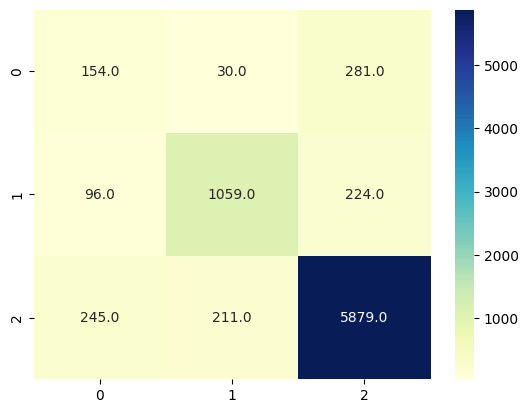

In [37]:
sns.heatmap(cm, annot = True, fmt = '.1f', cmap = 'YlGnBu')

In [38]:
# Check the Accuracy Score
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

0.8670986673187431

In [52]:
sample = 'aur kya chahiye behenchod'

In [53]:
sample = clean_data(sample)

In [54]:
sample

'aur kya chahiy behenchod'

In [55]:
data1 = cv.transform([sample]).toarray()

In [56]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)

In [46]:
d1 = 'hey man , you are just another roadside motherfucker'

In [47]:
d1 = clean_data(d1)

In [48]:
d1

'hey man  anoth roadsid motherfuck'

In [49]:
data1 = cv.transform([d1]).toarray()

In [51]:
dt.predict(data1)

array(['No Hate Speech or Offensive'], dtype=object)